In [1]:
from helpers import *
from tqdm import notebook
from joblib import Parallel, delayed
import scipy.stats as st
import pandas as pd
import seaborn as sns
from itertools import zip_longest
import csv

In [2]:
df = pd.read_csv("data/a280.tsp.txt", skiprows=6, names=["id", "x", "y"], 
                 header=None, delimiter = r"[ ]{1,}", index_col=0, engine='python').drop("EOF")

In [48]:
# globals
START_TEMP = 10
ALPHA = 0.99
STOP_TEMP = 0.1
MARKOV_LENGTH = 50
STRAT = "2opt"
DATA_POINTS = 160

In [46]:
# elementary edit experiment
def experiment1(strat, alt_strat=False, second_strat=-1):
    sim = AnnealTVS(df, K=START_TEMP, stopK=STOP_TEMP, alpha = ALPHA, markov_length = MARKOV_LENGTH, elementary=strat, alternate=alt_strat, secondary=second_strat)
    ans = sim.run_sim()
    return ans    

In [49]:
%%time
# try 2opt
strat="2opt"
results_2opt= Parallel(n_jobs=8)(delayed(experiment1)(strat = strat)
                                      for i in range(DATA_POINTS))
strat="insert"
results_insert= Parallel(n_jobs=8)(delayed(experiment1)(strat = strat)
                                      for i in range(DATA_POINTS))
strat="swap"
results_swap= Parallel(n_jobs=8)(delayed(experiment1)(strat = strat)
                                      for i in range(DATA_POINTS))
strat="insert"
second_strat="2opt"
results_ins2opt= Parallel(n_jobs=8)(delayed(experiment1)(strat = strat, alt_strat = True, second_strat = second_strat)
                                      for i in range(DATA_POINTS))


KeyboardInterrupt: 

In [ ]:
res_2opt = []
for result in results_2opt:
    res_2opt.append(result[0])

res_insert = []
for result in results_insert:
    res_insert.append(result[0])

res_swap = []
for result in results_swap:
    res_swap.append(result[0])

res_ins2opt = []
for result in results_ins2opt:
    res_ins2opt.append(result[0])

with open('./outputdata/stratcomp.csv', 'w', newline='') as myfile:
    w = csv.writer(myfile)
    # w.writerow(['2opt','insert','swap'])
    for x, y, z, a in zip_longest(res_2opt, res_insert, res_swap, res_ins2opt):
        w.writerow([x, y, z, a])

In [ ]:
# r_2opt, r_insert, r_swap = np.loadtxt("./outputdata/stratcomp.csv", delimiter=",", unpack=True)
r_2opt, r_insert, r_swap, r_ins2opt = np.loadtxt("./outputdata/stratcomp_v2.csv", delimiter=",", unpack=True)
all_strat_results = [r_2opt, r_insert, r_swap, r_ins2opt]
all_strat_names = ['2opt', 'insert', 'swap', 'insert-2opt']

In [ ]:
fig = plt.figure(figsize=(8, 6), dpi=100)
ax = fig.add_subplot(111, axisbelow=True)
ax = sns.kdeplot(r_2opt, shade=True, color="#0051a2", label='2opt')
ax = sns.kdeplot(r_insert, shade=True, color="#10542c", label='Insert')
ax = sns.kdeplot(r_swap, shade=True, color="#ff005e", label='Swap')
ax = sns.kdeplot(r_ins2opt, shade=True, color="red", label='Insert-2opt')
plt.xlabel('Tour Length')
plt.title('Mean Tour Lenghts for Different Strategies')
plt.legend()
plt.show()
fig.savefig("./figures/strats_distr.png")

In [ ]:
# set width of bars
barWidth = 0.5
bar = [np.mean(all_strat_results[i]) for i in range(len(all_strat_results))]
err = [np.std(all_strat_results[i]) for i in range(len(all_strat_results))]


# Set position of bar on X axis
r1 = np.arange(len(all_strat_results))

 
# Make the plot
fig = plt.figure(figsize=(8, 6), dpi=100)
ax = fig.add_subplot(111, axisbelow=True)
ax.bar(r1, bar, yerr = err, color="#0051a2", width=barWidth, edgecolor='white', capsize=10)

# Add xticks on the middle of the group bars
plt.ylabel('Mean Tour Length')
plt.xlabel('Strategies')
plt.title('Mean Tour Lengths for Different Strategies')
plt.xticks([r for r in range(len(all_strat_results))], all_strat_names)
plt.ylim(2500,)

 
# Create legend & Show graphic
plt.show()
fig.savefig("./figures/strats_barplot.png")

In [ ]:
# TESTS

#Welch test for equal
stat, pval = st.ttest_ind(r_2opt, r_insert, equal_var=False)
print(f'2opt vs. insert, p-value: {pval}, t-value: {stat}')
stat, pval = st.ttest_ind(r_2opt, r_swap, equal_var=False)
print(f'2opt vs. swap, p-value: {pval}, t-value: {stat}')
stat, pval = st.ttest_ind(r_insert, r_swap, equal_var=False)
print(f'insert vs. swap, p-value: {pval}, t-value: {stat}')

stat, pval = st.ttest_ind(r_insert, r_ins2opt, equal_var=False)
print(f'2opt vs. insert-2opt, p-value: {pval}, t-value: {stat}')

In [ ]:
# globals
START_TEMP = 3
ALPHA = 0.99
STOP_TEMP = 0.0001
MARKOV_LENGTH = 200
STRAT = "insert"
SECOND_STRAT = "2opt"
DATA_POINTS = 160

# starting temp experiment
def experiment2(temp):
    sim = AnnealTVS(df, K=temp, stopK=STOP_TEMP, alpha = ALPHA, markov_length = MARKOV_LENGTH, elementary=STRAT, alternate=True, secondary=SECOND_STRAT)
    ans = sim.run_sim()
    return ans   
    

In [ ]:
%%time
# try some temperatures
temp = 5
results_5= Parallel(n_jobs=8)(delayed(experiment2)(temp=temp)
                                      for i in range(DATA_POINTS))
temp = 10
results_10= Parallel(n_jobs=8)(delayed(experiment2)(temp=temp)
                                      for i in range(DATA_POINTS))
temp = 20
results_20= Parallel(n_jobs=8)(delayed(experiment2)(temp=temp)
                                      for i in range(DATA_POINTS))
temp = 30
results_30= Parallel(n_jobs=8)(delayed(experiment2)(temp=temp)
                                      for i in range(DATA_POINTS))
temp = 40
results_40= Parallel(n_jobs=8)(delayed(experiment2)(temp=temp)
                                      for i in range(DATA_POINTS))
temp = 50
results_50= Parallel(n_jobs=8)(delayed(experiment2)(temp=temp)
                                      for i in range(DATA_POINTS))
temp = 100
results_100= Parallel(n_jobs=8)(delayed(experiment2)(temp=temp)
                                      for i in range(DATA_POINTS))



In [ ]:
res_t5 = []
for result in results_5:
    res_t5.append(result[0])

res_t10 = []
for result in results_10:
    res_t10.append(result[0])

res_t20 = []
for result in results_20:
    res_t20.append(result[0])

res_t30 = []
for result in results_30:
    res_t30.append(result[0])

res_t40 = []
for result in results_40:
    res_t40.append(result[0])

res_t50 = []
for result in results_50:
    res_t50.append(result[0])

res_t100 = []
for result in results_100:
    res_t100.append(result[0])

with open('./outputdata/tempcomp.csv', 'w', newline='') as myfile:
    w = csv.writer(myfile)
    # w.writerow(['2opt','insert','swap'])
    for a, b, c, d, e, f, g in zip_longest(res_t5, res_t10, res_t20, res_t30, res_t40, res_t50, res_t100):
        w.writerow([a, b, c, d, e, f, g])

In [ ]:
# Analyze results of different temperatures
res_t5, res_t10, res_t20, res_t30, res_t40, res_t50, res_t100 = np.loadtxt("./outputdata/tempcomp.csv", delimiter=",", unpack=True)
all_temp_results = [res_t5, res_t10, res_t20, res_t30, res_t40, res_t50, res_t100]
all_temp_names = [5, 10, 20, 30, 40, 50, 100]

In [ ]:
# set width of bars
barWidth = 0.5
bar = [np.mean(all_temp_results[i]) for i in range(len(all_temp_results))]
err = [np.std(all_temp_results[i]) for i in range(len(all_temp_results))]


# Set position of bar on X axis
r1 = np.arange(len(all_temp_results))

 
# Make the plot
fig = plt.figure(figsize=(8, 6), dpi=100)
ax = fig.add_subplot(111, axisbelow=True)
ax.bar(r1, bar, yerr = err, color="#0051a2", width=barWidth, edgecolor='white', capsize=10)

# Add xticks on the middle of the group bars
plt.ylabel('Mean Tour Length')
plt.xlabel('Starting Temperatures')
plt.title('Mean Tour Lengths for Different Starting Temperatures')
plt.xticks([r for r in range(len(all_temp_results))], all_temp_names)
plt.ylim(2500,)

 
# Create legend & Show graphic
plt.show()
fig.savefig("./figures/temp_barplot.png")

In [ ]:
fig = plt.figure(figsize=(8, 6), dpi=100)
ax = fig.add_subplot(111, axisbelow=True)
for i in range(len(all_temp_results)):
    ax = sns.kdeplot(all_temp_results[i], shade=False, label=all_temp_names[i])
plt.xlabel('Tour Length')
plt.title('Mean Tour Lenghts for Different Starting Temperatures')
plt.legend()
plt.show()
fig.savefig("./figures/temp_distr.png")

In [ ]:
# TESTS

#Welch test
stat, pval = st.ttest_ind(res_t5, res_t100, equal_var=False)
print(f'5 vs. 100, p-value: {pval}, t-value: {stat}')
stat, pval = st.ttest_ind(res_t50, res_t100, equal_var=False)
print(f'50 vs. 100, p-value: {pval}, t-value: {stat}')
stat, pval = st.ttest_ind(res_t5, res_t10, equal_var=False)
print(f'5 vs. 10, p-value: {pval}, t-value: {stat}')
stat, pval = st.ttest_ind(res_t5, res_t20, equal_var=False)
print(f'5 vs. 20, p-value: {pval}, t-value: {stat}')


In [ ]:
# mins = [np.min(all_temp_results[i]) for i in range(len(all_temp_results))]
# print(mins)

In [ ]:
# globals
START_TEMP = 3
ALPHA = 0.99
STOP_TEMP = 0.0001
MARKOV_LENGTH = 200
STRAT = "insert"
SECOND_STRAT = "2opt"
DATA_POINTS = 160

# Markov Chain length
def experiment3(length):
    sim = AnnealTVS(df, K=START_TEMP, stopK=STOP_TEMP, alpha = ALPHA, markov_length = length, elementary=STRAT, alternate=True, secondary=SECOND_STRAT)
    ans = sim.run_sim()
    return ans   
    

In [ ]:
%%time
# try some lengths
length = 50
results_50= Parallel(n_jobs=8)(delayed(experiment3)(length=length)
                                      for i in range(DATA_POINTS))
length = 100
results_100= Parallel(n_jobs=8)(delayed(experiment3)(length=length)
                                      for i in range(DATA_POINTS))
length = 200
results_200= Parallel(n_jobs=8)(delayed(experiment3)(length=length)
                                      for i in range(DATA_POINTS))
length = 300
results_300= Parallel(n_jobs=8)(delayed(experiment3)(length=length)
                                      for i in range(DATA_POINTS))
length = 400
results_400= Parallel(n_jobs=8)(delayed(experiment3)(length=length)
                                      for i in range(DATA_POINTS))              
length = 500
results_500= Parallel(n_jobs=8)(delayed(experiment3)(length=length)
                                      for i in range(DATA_POINTS))

In [ ]:
res_len50 = []
for result in results_50:
    res_len50.append(result[0])

res_len100 = []
for result in results_100:
    res_len100.append(result[0])

res_len200 = []
for result in results_200:
    res_len200.append(result[0])

res_len300 = []
for result in results_300:
    res_len300.append(result[0])

res_len400 = []
for result in results_400:
    res_len400.append(result[0])

res_len500 = []
for result in results_500:
    res_len500.append(result[0])

with open('./outputdata/markovlencomp.csv', 'w', newline='') as myfile:
    w = csv.writer(myfile)
    # w.writerow(['2opt','insert','swap'])
    for a, b, c, d, e, f in zip_longest(res_len50, res_len100, res_len200, res_len300, res_len400, res_len500):
        w.writerow([a, b, c, d, e, f])

In [ ]:
res_len50, res_len100, res_len200, res_len300, res_len400, res_len500 = np.loadtxt("./outputdata/markovlencomp.csv", delimiter=",", unpack=True)
all_len_results = [res_len50, res_len100, res_len200, res_len300, res_len400, res_len500]
all_len_names = [50, 100, 200, 300, 400, 500]

In [ ]:
# set width of bars
barWidth = 0.5
bar = [np.mean(all_len_results[i]) for i in range(len(all_len_results))]
err = [np.std(all_len_results[i]) for i in range(len(all_len_results))]


# Set position of bar on X axis
r1 = np.arange(len(all_len_results))

 
# Make the plot
fig = plt.figure(figsize=(8, 6), dpi=100)
ax = fig.add_subplot(111, axisbelow=True)
ax.bar(r1, bar, yerr = err, color="#0051a2", width=barWidth, edgecolor='white', capsize=10)

# Add xticks on the middle of the group bars
plt.ylabel('Mean Tour Length')
plt.xlabel('Starting Temperatures')
plt.title('Mean Tour Lengths for Different Markov Chain Lengths')
plt.xticks([r for r in range(len(all_len_results))], all_len_names)
plt.ylim(2500,)

 
# Create legend & Show graphic
plt.show()
fig.savefig("./figures/len_barplot.png")

In [ ]:
fig = plt.figure(figsize=(8, 6), dpi=100)
ax = fig.add_subplot(111, axisbelow=True)
for i in range(len(all_len_results)):
    ax = sns.kdeplot(all_len_results[i], shade=False, label=all_len_names[i])
plt.xlabel('Tour Length')
plt.title('Mean Tour Lenghts for Different Markov Chain Lengths')
plt.legend()
plt.show()
fig.savefig("./figures/len_distr.png")

In [ ]:
#Welch test 
stat, pval = st.ttest_ind(res_len50, res_len100, equal_var=False)
print(f'50 vs. 100, p-value: {pval}, t-value: {stat}')
stat, pval = st.ttest_ind(res_len100, res_len200, equal_var=False)
print(f'100 vs. 200, p-value: {pval}, t-value: {stat}')
stat, pval = st.ttest_ind(res_len200, res_len300, equal_var=False)
print(f'200 vs. 300, p-value: {pval}, t-value: {stat}')
stat, pval = st.ttest_ind(res_len300, res_len400, equal_var=False)
print(f'300 vs. 400, p-value: {pval}, t-value: {stat}')
stat, pval = st.ttest_ind(res_len300, res_len500, equal_var=False)
print(f'300 vs. 500, p-value: {pval}, t-value: {stat}')

In [ ]:
def nearest_neighbours(df, matrix):
    """Creates a starting point using a greedy nearest neighbour algorithm.
    Returns:
        List: A list with the order of the cities that are travelled.
    """
    free_nodes = []
    for row in range(df.shape[0]):
        free_nodes.append(df.iloc[row].name)
    sol = []
    cur_node = df.loc[random.choice(free_nodes)]
    sol.append(cur_node.name)
    free_nodes.remove(cur_node.name)
    while free_nodes:
        first = True
        for node in free_nodes:
            next_node = df.loc[node]
            new_dist = get_distance(cur_node["x"], cur_node["y"], next_node["x"], next_node["y"])
            if first:
                closest = node
                old_dist = new_dist
                first = False
            else: 
                if new_dist < old_dist:
                    closest = node
                    old_dist = new_dist
        sol.append(closest)
        cur_node = df.loc[closest]
        free_nodes.remove(closest)
        
    dist = total_distance(matrix, sol)
        
    return dist


def get_distance(x1, y1, x2, y2) :
    """Computes the Euclidean distance between two points.
    Args:
        x1 (int): X coordinate of the first city.
        y1 (int): Y coordinate of the first city.
        x2 (int): X coordinate of the second city.
        y2 (int): X coordinate of the second city.
    Returns:
        [float]: Distance.
    """
    return np.sqrt((x1-x2)**2 + abs(y1-y2)**2)


def total_distance(dist_matrix, solution):
    """The total distance of a given solution
    Args:
        solution (int, optional): A solution.
    Returns:
        float: Total distance.
    """

    distance = 0
    for i in range(len(solution)-1):
        distance += dist_matrix[int(solution[i])-1][int(solution[i+1])-1]
    # make it a circle
    distance += dist_matrix[int(solution[i+1])-1][int(solution[0])-1]
    return distance


def build_matrix(df):
    """Builds a distance matrix of all the cities in the dataframe.
    Returns:
        [numpy matrix]: A matrix that contains the distance between two cities
    """
    matrix = np.zeros((len(df),len(df)))
    for row in range(len(df)):
        fro = df.loc[f"{row+1}"]
        for column in range(len(df)):
            if row != column:
                to = df.loc[f"{column+1}"]
                matrix[row][column] = get_distance(fro["x"], fro["y"], to["x"], to["y"])
    
    return matrix

In [ ]:
matrix = build_matrix(df)

In [ ]:
results_start= Parallel(n_jobs=8)(delayed(nearest_neighbours)(matrix=matrix, df=df)
                                      for i in range(3))

In [ ]:
with open('./outputdata/startingpoints.csv', 'w', newline='') as myfile:
    w = csv.writer(myfile)
    # w.writerow(['2opt','insert','swap'])
    for a in results_start:
        w.writerow([a])

In [ ]:
results_start= Parallel(n_jobs=8)(delayed(nearest_neighbours)(matrix=matrix, df=df)
                                      for i in range(300))

In [ ]:
sim = AnnealTVS(df, K=200, repeats=1,stopK=.001, alpha = 0.99, all_distances=True,markov_length = 300,
                alternate=True, secondary="2opt", elementary="insert")
ans = sim.run_sim()


In [ ]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(ans[0][0], color="red")
# set x-axis label
ax.set_xlabel("iterations")
# set y-axis label
ax.set_ylabel("distance",color="red")

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(ans[0][1],color="blue")
ax2.set_ylabel("Temperature",color="blue")
plt.show()
# save the plot as a file
fig.savefig('figures\distance_through_time200.pdf',
            format='pdf',
            dpi=300,
            bbox_inches='tight')

In [61]:
# find the best solution
def experiment5():
    sim = AnnealTVS(df, K=5, repeats=1,stopK=.001, alpha = 0.99,markov_length = 300,
                alternate=True, secondary="2opt", elementary="insert", return_solution=True)
    ans = sim.run_sim()
    
    return ans

In [62]:
results_final= Parallel(n_jobs=8)(delayed(experiment5)()
                                      for i in range(150))

In [66]:
results_final[0][0]

[2826.958805056498,
 ['33',
  '36',
  '38',
  '37',
  '50',
  '51',
  '52',
  '49',
  '48',
  '53',
  '54',
  '47',
  '46',
  '55',
  '56',
  '45',
  '44',
  '57',
  '58',
  '59',
  '62',
  '63',
  '64',
  '65',
  '86',
  '116',
  '115',
  '114',
  '111',
  '110',
  '112',
  '113',
  '87',
  '88',
  '82',
  '83',
  '84',
  '85',
  '66',
  '67',
  '68',
  '69',
  '70',
  '71',
  '72',
  '73',
  '74',
  '75',
  '76',
  '77',
  '78',
  '79',
  '80',
  '81',
  '89',
  '109',
  '108',
  '105',
  '106',
  '107',
  '174',
  '173',
  '172',
  '171',
  '170',
  '169',
  '102',
  '103',
  '104',
  '90',
  '91',
  '92',
  '93',
  '94',
  '95',
  '96',
  '97',
  '98',
  '99',
  '101',
  '100',
  '168',
  '167',
  '166',
  '165',
  '164',
  '163',
  '162',
  '161',
  '175',
  '160',
  '159',
  '158',
  '157',
  '119',
  '120',
  '121',
  '122',
  '117',
  '118',
  '61',
  '60',
  '43',
  '42',
  '41',
  '40',
  '39',
  '35',
  '34',
  '31',
  '30',
  '125',
  '124',
  '123',
  '126',
  '127',
  '12

In [67]:
with open('./outputdata/finals.csv', 'w', newline='') as myfile:
    w = csv.writer(myfile)
    # w.writerow(['2opt','insert','swap'])
    for a in results_final:
        w.writerow([a[0][0], a[0][1]])

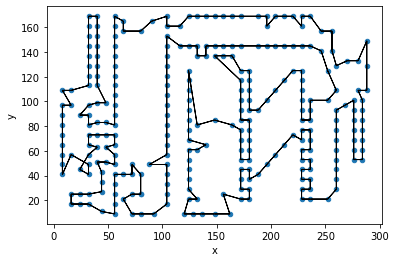

In [72]:
sim.solution = results_final[86][0][1]
sim.plot_solution()
plt.savefig("figures/final_solution.pdf", dpi=300)